<a href="https://colab.research.google.com/github/TutiAmalia/Klasifikasi-Gambar-/blob/main/PredictiveAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Pertama - Dicoding: Machine Learning Terapan**
## Analisis Prediktif : Prediksi Lonjakan Harga pada Layanan Taksi



## Pendahuluan
Pada proyek ini, topik yang dibahas adalah mengenai bisnis jasa ride hailing atau jasa transportasi yang menggunakan platform online yang di buat untuk memprediksi lonjakan harga pada layanan tranportasi taksi.

Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil
import missingno as msno 
%matplotlib inline
import seaborn as sns
from sklearn.utils import resample 

from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# 1. Mempersiapkan Dataset

## Informasi Dataset

Jenis  | Keterangan
-------------------|------------------
Sumber     | [Kaggle Dataset](https://www.kaggle.com/arashnic/taxi-pricing-with-mobility-analytics)
Lisensi     | CC0: Public Domain
Kategori     | bisnis, mobil dan kendaraan
Rating Penggunaan     | 9,7 (Bronze)
Jenis dan ukuran berkas     | CSV (7.68 MB)

## Informasi variabel yang digunakan

Variable  | Definition 
-------------------|------------------
Trip_ID      | ID for TRIP
Trip_Distance      | The distance for the trip requested by the customer
 TypeofCab |Category of the cab requested by the custome
 CustomerSinceMonths | Customer using cab services since n months; 0 month means current month
 LifeStyleIndex | Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
 ConfidenceLifeStyle_Index | Category showing confidence on the index mentioned above
 Destination_Type | Sigma Cabs divides any destination in one of the 14 categories.
 Customer_Rating | Average of life time ratings of the customer till date
 CancellationLast1Month | Number of trips cancelled by the customer in last 1 month
 Var1, Var2 and Var3 | Continuous variables masked by the company. Can be used for modelling purposes
 Gender | Gender of the customer
 SurgePricingType | Target (can be of 3 types)



---



---



Variable  | Definition 
-------------------|------------------
Trip_ID      | ID untuk perjalanan
Trip_Distance      | Jarak perjalanan yang diminta oleh pelanggan
TypeofCab |Kategori taksi yang diminta oleh pelanggan
CustomerSinceMonths | Pelanggan menggunakan layanan taksi sejak n bulan; 
LifeStyleIndex | Indeks kepemilikan yang dibuat oleh Sigma Cabs yang menunjukkan gaya hidup pelanggan berdasarkan perilaku mereka
ConfidenceLifeStyle_Index | Kategori yang menunjukkan kepercayaan pada indeks yang disebutkan diatas
Destination_Type | Sigma Cabs membagi setiap tujuan dalam satu dari 14 kategori
Customer_Rating | Rata-rata peringkat waktu hidup pelanggan hingga saat ini
CancellationLast1Month | Jumlah perjalanan yang dibatalkan oleh pelanggan dalam 1 bulan terakhir
Var1, Var2 and Var3 | Variabel kontinu yang ditutupi oleh perusahaan. Dapat digunakan untuk tujuan pemodelan
Gender | Jenis kelamin pelanggan
SurgePricingType | Target (terdapat 3 jenis harga lonjakan penggunaan layanan taxi)

In [2]:
# Download dataset
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1rjxaWZPxGx_3jgajpuLaxG1iRpUlMUza'  \
  -O 'sigma_cabs.csv'

--2021-10-09 12:04:29--  https://drive.google.com/uc?export=download&id=1rjxaWZPxGx_3jgajpuLaxG1iRpUlMUza
Resolving drive.google.com (drive.google.com)... 173.194.214.138, 173.194.214.100, 173.194.214.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.214.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ar47kfo3nqsb20735bug49tj99l7h9cl/1633781025000/12137666749112449155/*/1rjxaWZPxGx_3jgajpuLaxG1iRpUlMUza?e=download [following]
--2021-10-09 12:04:30--  https://doc-14-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ar47kfo3nqsb20735bug49tj99l7h9cl/1633781025000/12137666749112449155/*/1rjxaWZPxGx_3jgajpuLaxG1iRpUlMUza?e=download
Resolving doc-14-9g-docs.googleusercontent.com (doc-14-9g-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-14-9g-docs.googleusercontent.com (d

# 2. Data Understanding
- **Data Loading**

In [3]:
# memuat data yang akan digunakan
df = pd.read_csv('sigma_cabs.csv')
df

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


In [4]:
# memuat informasi setiap kolom dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [5]:
# Drop Trip_ID
df.drop(["Trip_ID"], axis = 1, inplace=True)

Dari dataset diatas terdapat 9 data numerik dan 5 data kategorik

In [6]:
# Numerical columns
df_num = df.select_dtypes(include=['float64','int64'])
df_num.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

In [7]:
# Categorical columns
df_catg = df.select_dtypes(include=['object'])
df_catg.columns

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

In [8]:
# Memuat deskripsi setiap kolom dataframe
df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


- **Duplicate value**

In [9]:
# memeriksa tidak ada hasil duplikat yang ada dalam kumpulan data.

df.duplicated().sum()

0

- **Missing Value**

In [10]:
# cek apakah ada missing data
# df.isnull().any()
df.isnull().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [11]:
# Persentase nilai yg null
df.isnull().sum()/len(df)*100

Trip_Distance                   0.000000
Type_of_Cab                    15.349911
Customer_Since_Months           4.496362
Life_Style_Index               15.336999
Confidence_Life_Style_Index    15.336999
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.948748
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

## Visualisasi Data

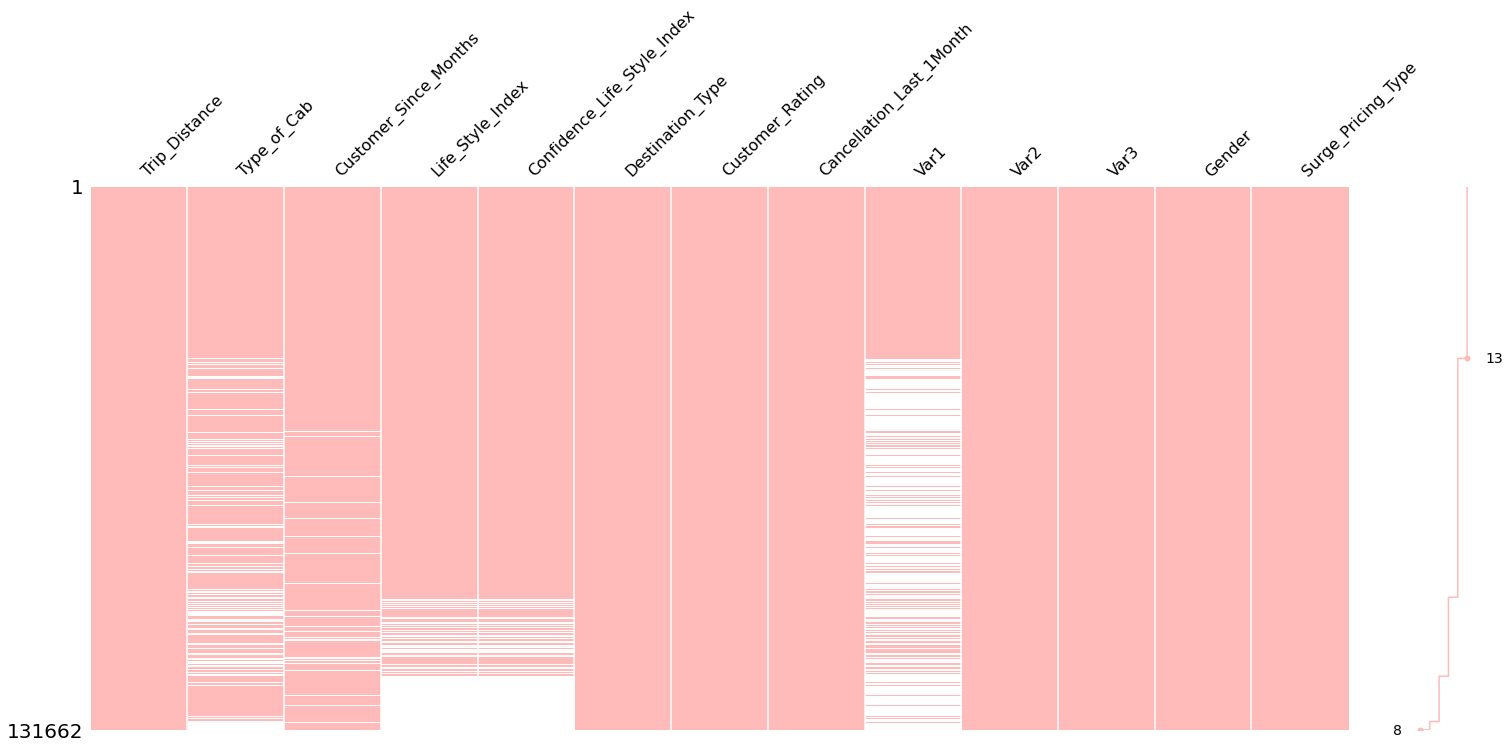

In [12]:
# Melakukan visualisasi data yang kosong
sorted_null = msno.nullity_sort(df, sort='descending') 
figures = msno.matrix(sorted_null, color=(1, 0.73, 0.73))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


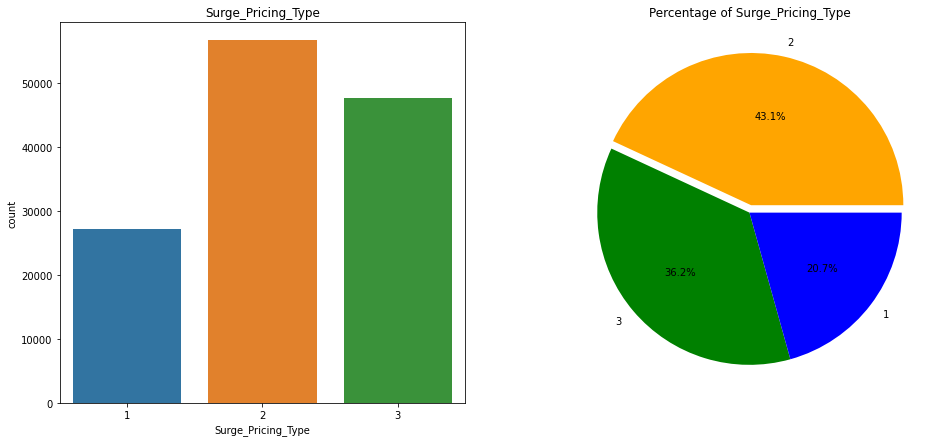

In [13]:
# Plotting variabel Surge_Pricing_Type (variabel target)
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.title('Surge_Pricing_Type')
sns.countplot(df['Surge_Pricing_Type'])

plt.subplot(1,2,2)
plt.pie(df['Surge_Pricing_Type'].value_counts(), explode=[0.05,0,0] , colors=[ 'orange', 'green', 'blue'] ,autopct='%.1f%%', labels=['2', '3', '1'], labeldistance=1.1)
plt.title('Percentage of Surge_Pricing_Type')

plt.show()

In [14]:
# Membuat fungsi untuk plotting variabel numerik dan kategorik
def plotting(df, fname, var_type):
    plt.figure(figsize = (15,5))
    if var_type == 'num':
        sns.distplot(df[fname])
        plt.xlabel(fname)
        plt.title("Density Plot for {}".format(fname))
        plt.show()
        
    elif var_type == 'catg':
        sns.countplot(x = df[fname])
        plt.title("Barplot for {}".format(fname))
        plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


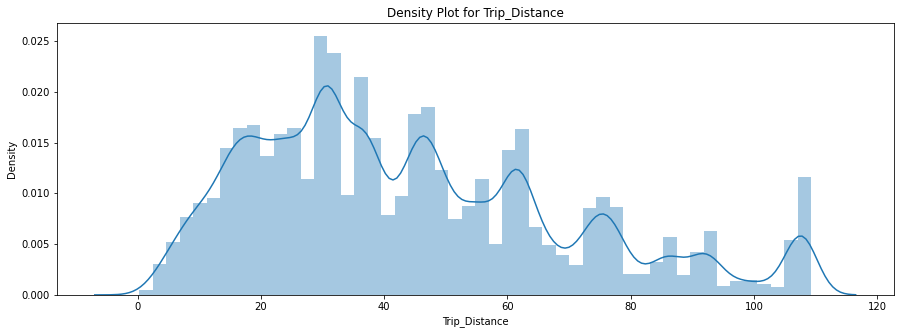

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


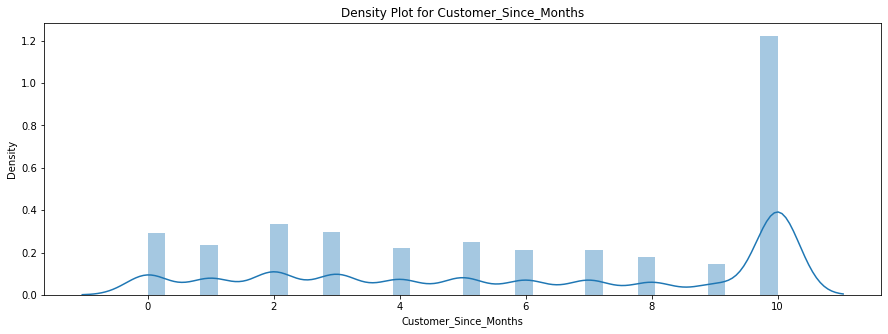

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


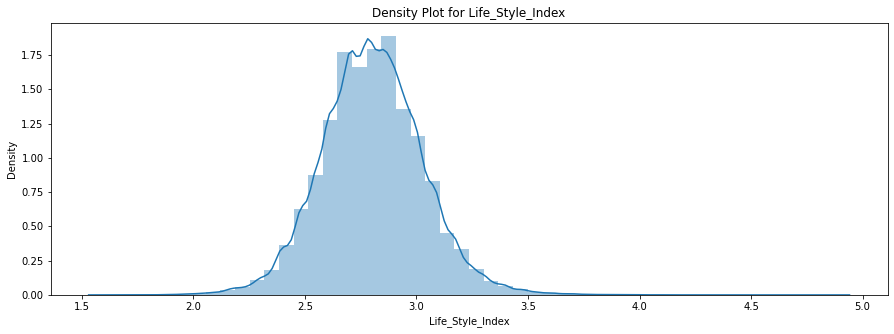

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


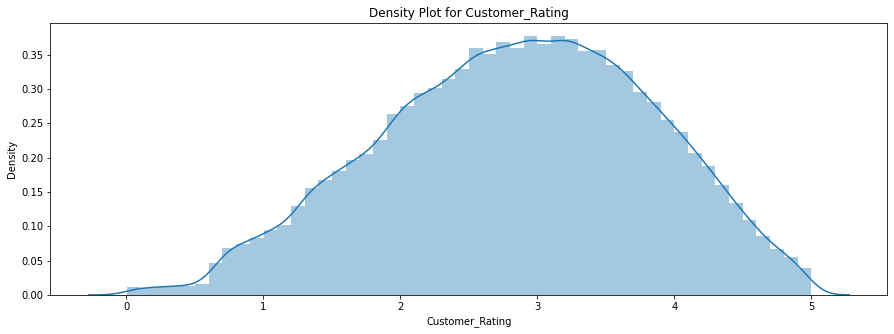

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


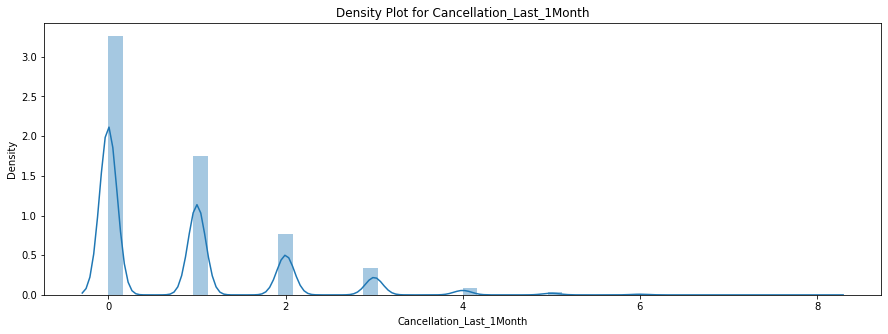

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


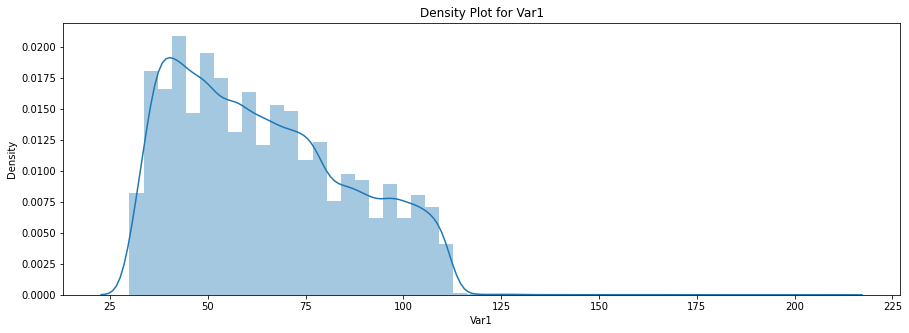

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


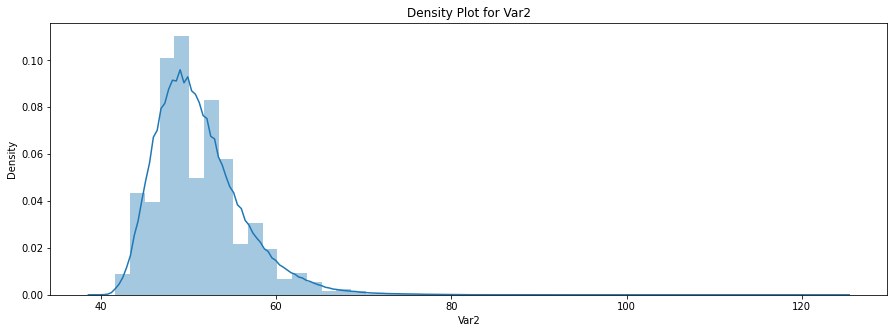

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


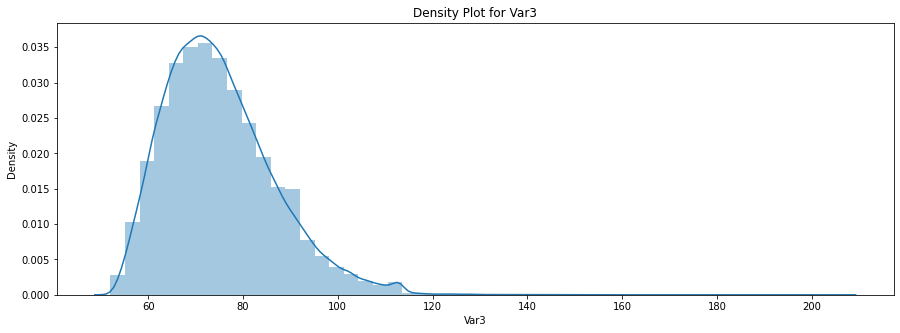

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


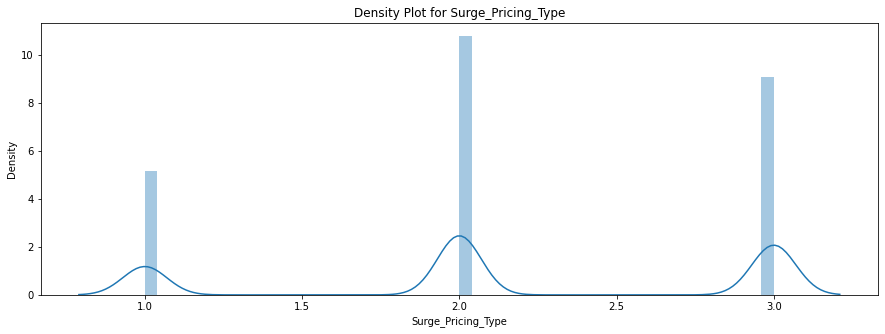

In [15]:
# Untuk variabel numerik
for i in df_num.columns:
    plotting(df_num, i, 'num')

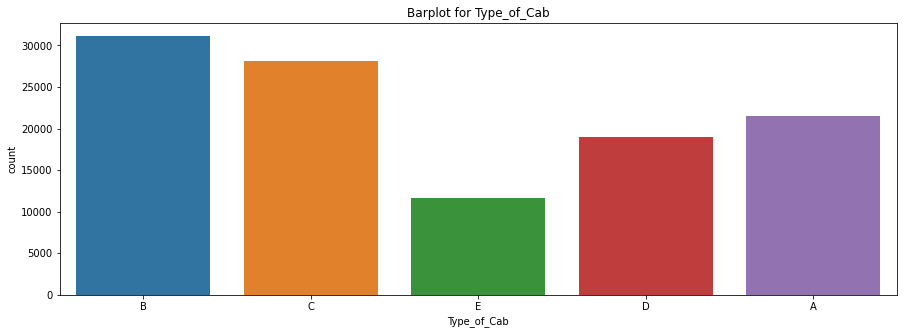

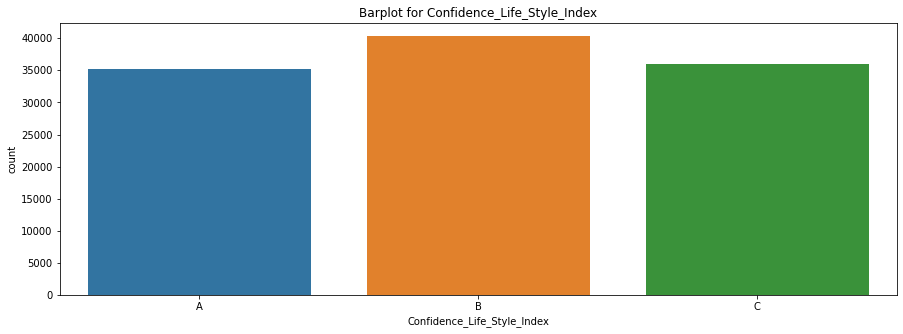

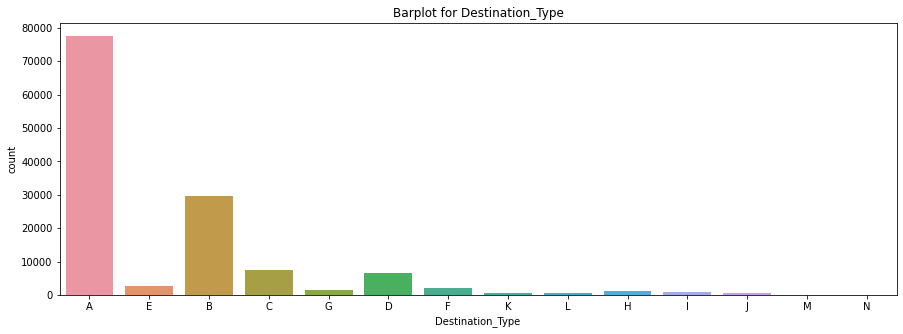

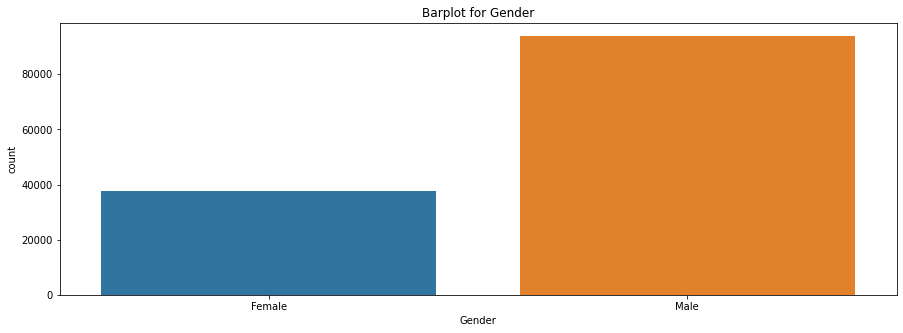

In [16]:
# Untuk variabel kategorik
for i in df_catg.columns:
    plotting(df_catg, i, 'catg')

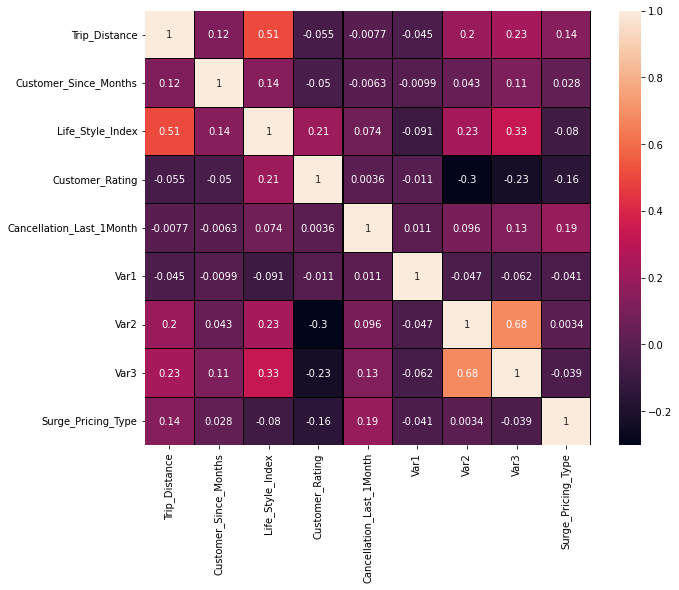

In [17]:
# Visualisasi heatmap dari korelasi data
# semakin mendekati 1 semakin tinggi korelasi datanya
# semkain mendekati -1 semakin rendah korelasi datanya

plt.figure(figsize = (10,8))
corr = df.corr()
sns.heatmap(corr, linewidth = 0.1, linecolor = "black", annot = True)
plt.autoscale(enable=True, axis='y')
plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


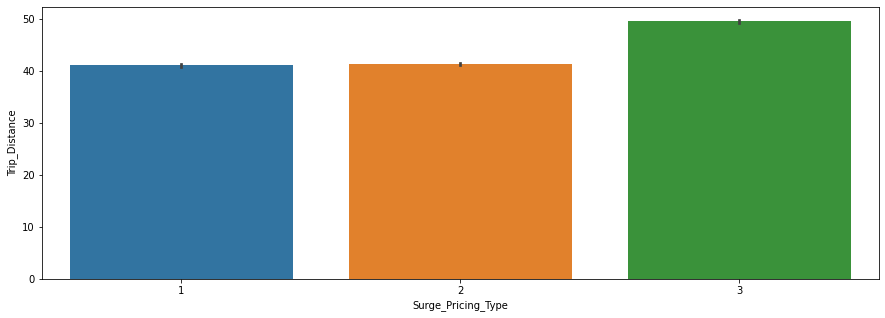

In [18]:
# Korelasi variabel target dengan Trip_Distance
plt.figure(figsize=(15,5))
sns.barplot(df['Surge_Pricing_Type'],df['Trip_Distance'])
plt.show()

<Figure size 1080x360 with 0 Axes>

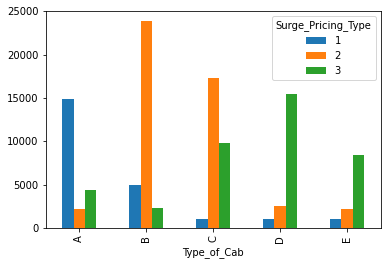

In [19]:
# Korelasi variabel target dengan Type_of_Cab
plt.figure(figsize=(15,5))
pd.crosstab(df['Type_of_Cab'],df['Surge_Pricing_Type']).plot(kind = 'bar')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


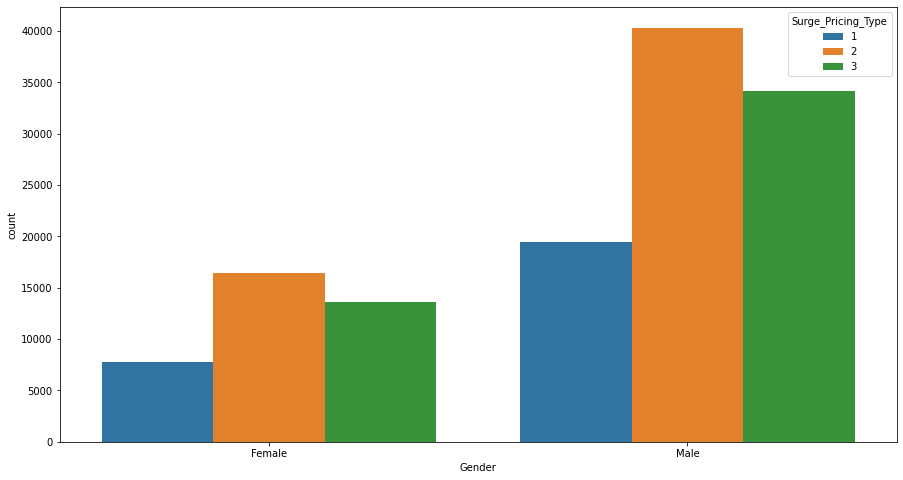

In [20]:
# Korelasi variabel target dengan gender
plt.figure(figsize=(15,8))
sns.countplot(df['Gender'],hue = df['Surge_Pricing_Type'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


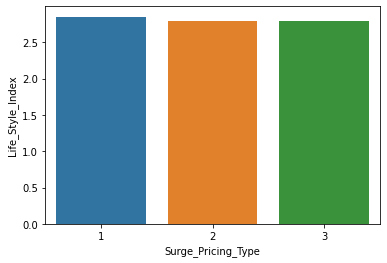

In [21]:
# Korelasi variabel target dengan Life_Style_Index
sns.barplot(df['Surge_Pricing_Type'],df['Life_Style_Index'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


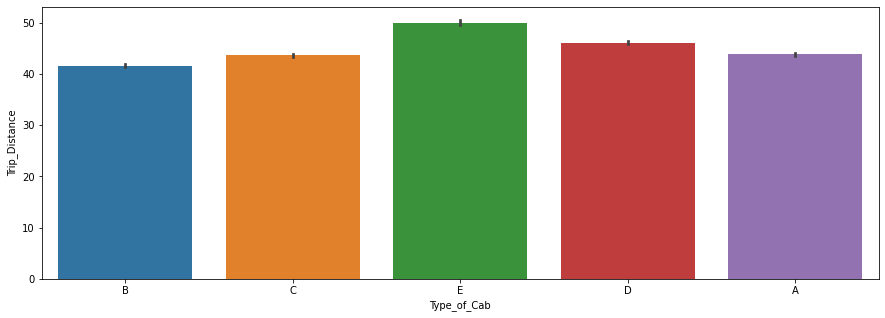

In [22]:
# Korelasi variabel type_of_Cab dengan Trip_Distance
plt.figure(figsize=(15,5))
sns.barplot(df['Type_of_Cab'],df['Trip_Distance'])
plt.show()

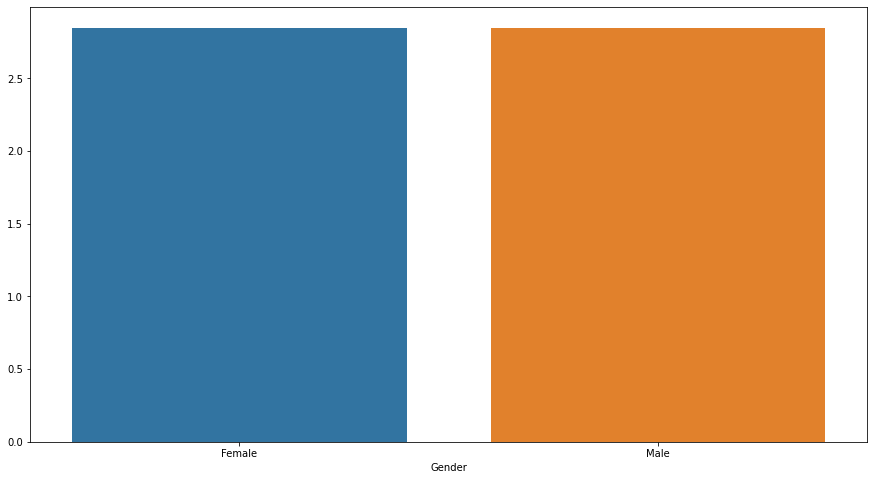

In [23]:
# Korelasi variabel gender dengan Customer_Rating
plt.figure(figsize=(15,8))
gender_mean = df.groupby('Gender')['Customer_Rating'].mean()
sns.barplot(x=gender_mean.index, y=gender_mean.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


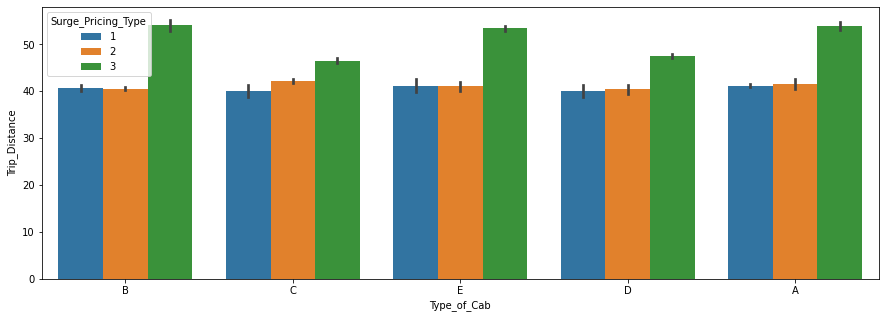

In [24]:
# Korelasi variabel target dengan Trip_Distance dan Type_Of_Cab
plt.figure(figsize=(15,5))
sns.barplot(df['Type_of_Cab'],df['Trip_Distance'],hue = df['Surge_Pricing_Type'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


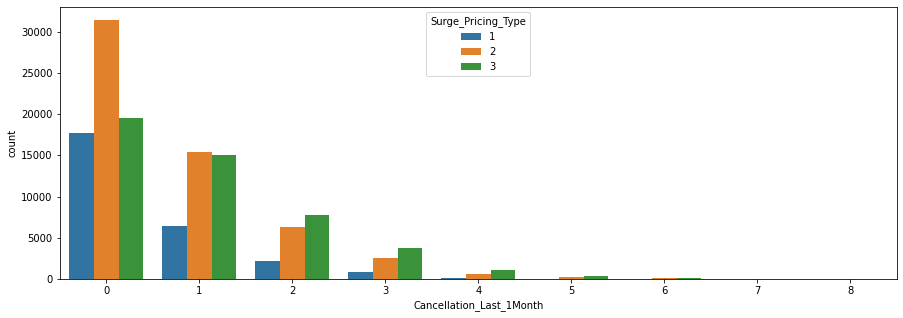

In [25]:
# Korelasi variabel target dengan Cancellation_Last_1Month
plt.figure(figsize=(15,5))
sns.countplot(df['Cancellation_Last_1Month'],hue = df['Surge_Pricing_Type'])
plt.show()

In [26]:
# Menghitung correlation matrix
corr = df_num.corr()
# Cek hasil dari correlation score
print(corr['Surge_Pricing_Type'].sort_values(ascending=False), '\n')

Surge_Pricing_Type          1.000000
Cancellation_Last_1Month    0.185646
Trip_Distance               0.135928
Customer_Since_Months       0.027827
Var2                        0.003437
Var3                       -0.039309
Var1                       -0.040735
Life_Style_Index           -0.080108
Customer_Rating            -0.155279
Name: Surge_Pricing_Type, dtype: float64 



# 3. Data Preparation
- Mengatasi data yang kosong 

Setelah memuat informasi setiap kolom/variabel data numerik dapat diamati bahwa variabel Customer_Since_Month memiliki data null 4%, Life_Style_Index 15%, Var1 53%

In [27]:
# Melakukan penggantian data kosong dengan nilai rata rata kolom 
# dan memasukkannya pada variabel df
df['Customer_Since_Months'].fillna(value=df['Customer_Since_Months'].mean(),inplace=True)
df['Life_Style_Index'].fillna(value=df['Life_Style_Index'].mean(),inplace=True)
df['Var1'].fillna(value=int(df['Var1'].mean()),inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  111452 non-null  object 
 2   Customer_Since_Months        131662 non-null  float64
 3   Life_Style_Index             131662 non-null  float64
 4   Confidence_Life_Style_Index  111469 non-null  object 
 5   Destination_Type             131662 non-null  object 
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         131662 non-null  float64
 9   Var2                         131662 non-null  int64  
 10  Var3                         131662 non-null  int64  
 11  Gender                       131662 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  int64  
dtyp

In [29]:
# Menghitung untuk variabel kategorik

df['Type_of_Cab'] = df['Type_of_Cab'].fillna(df['Type_of_Cab'].mode()[0])
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].fillna(df['Confidence_Life_Style_Index'].mode()[0])

In [30]:
# Mengecek kembali nilai yang kosong pada dataset
df.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

- Oversampling data yang tidak seimbang

In [31]:
# Memisahkan fitur dengan target
X = df.drop(['Surge_Pricing_Type'],axis=1)
y = df['Surge_Pricing_Type']

In [32]:
# Melakukan oversampling
oversampler = RandomOverSampler(random_state=10)
X_resample, y_resample = oversampler.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


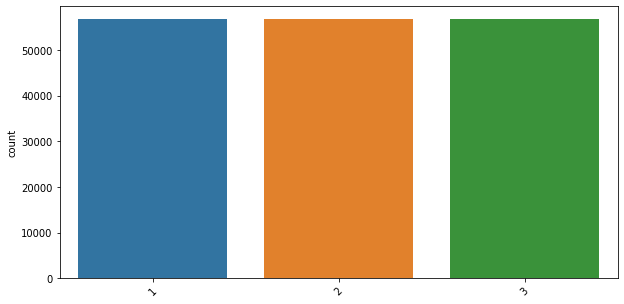

In [33]:
# Plotting variabel target
plt.figure(figsize=(10,5))
sns.countplot(y_resample)
plt.xticks(rotation=45)
plt.show()

In [34]:
# Cek distribusi data setelah oversampling
from collections import Counter
print('Dataset aktual {}'.format(Counter(y)))
print('Dataset setelah oversampling {}'.format(Counter(y_resample)))

Dataset aktual Counter({2: 56728, 3: 47720, 1: 27214})
Dataset setelah oversampling Counter({2: 56728, 3: 56728, 1: 56728})


- Encoding

  Menggunakan Label Encoding


In [35]:
X = pd.get_dummies(X,columns = ['Type_of_Cab','Confidence_Life_Style_Index','Gender', 'Destination_Type'],drop_first=True)
X.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Gender_Male,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N
0,6.77,1.0,2.427690,3.90500,0,40.0,46,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.782450,3.45000,0,38.0,56,78,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,41.58,10.0,2.802064,3.50125,2,64.0,56,77,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,61.56,10.0,2.802064,3.45375,0,64.0,52,74,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,54.95,10.0,3.034530,3.40250,4,51.0,49,102,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


- Train_Test_Split

In [36]:
# Melakukan pembagian data dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print("Total data train: ", len(y_train))
print("Total data test: ", len(y_test))

Total data train:  105329
Total data test:  26333


- Standarisasi nilai data pada fitur numerik dengan StandarScaler

In [37]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi fungsi MinMaxScaler
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Mengecek jumlah baris pada data latih dan data 
print(X_train.shape)
print(X_test.shape)

(105329, 28)
(26333, 28)


# 4. Pembuatan Model



---



---



- Menggunakan Algoritma Random Forest

In [40]:
model_random = RandomForestClassifier(random_state=0)
model_random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
y_pred1 = model_random.predict(X_test)

In [43]:
conf1 = confusion_matrix(y_test, y_pred1)

In [44]:
print(accuracy_score(y_test, y_pred1))

0.6853757642501804


In [45]:
# Laporan hasil klasifikasi model baseline
report1 = classification_report(y_test, y_pred1, output_dict=True, target_names=['1','2', '3'])
pd.DataFrame(report1).transpose()

,precision,recall,f1-score,support
1,0.762500,0.530435,0.625641,5405.000000
2,0.642482,0.816689,0.719186,11385.000000
3,0.726207,0.616473,0.666856,9543.000000
accuracy,0.685376,0.685376,0.685376,0.685376
macro avg,0.710396,0.654532,0.670561,26333.000000
weighted avg,0.697458,0.685376,0.681021,26333.000000




---



---



- LGBM Classifier

In [46]:
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [47]:
y_pred2 = model_lgbm.predict(X_test)

In [48]:
conf2 = confusion_matrix(y_test, y_pred2)

In [49]:
print(accuracy_score(y_test, y_pred2))

0.6940720768617324


In [50]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.78      0.53      0.63      5405
           2       0.64      0.84      0.73     11385
           3       0.75      0.62      0.68      9543

    accuracy                           0.69     26333
   macro avg       0.72      0.66      0.68     26333
weighted avg       0.71      0.69      0.69     26333



In [51]:
# Laporan hasil klasifikasi model baseline
report2 = classification_report(y_test, y_pred2, output_dict=True, target_names=['1','2', '3'])
pd.DataFrame(report2).transpose()

,precision,recall,f1-score,support
1,0.780044,0.530805,0.631730,5405.000000
2,0.644744,0.836100,0.728058,11385.000000
3,0.746293,0.617102,0.675576,9543.000000
accuracy,0.694072,0.694072,0.694072,0.694072
macro avg,0.723694,0.661335,0.678455,26333.000000
weighted avg,0.709316,0.694072,0.689267,26333.000000


# 5. Evaluasi Model

- Membandingkan hasil akurasi dari algoritma Random Forest dan LGBM

In [52]:
# Memasukkan hasil laporan klasifikasi model
metrics = pd.DataFrame({'accuracy' : [report1['accuracy'], report2['accuracy']],
                        'f1-score_0' : [report1['1']['f1-score'],report2['1']['f1-score']],
                        'precision_0' : [report1['1']['precision'],report2['1']['precision']],
                        'recall_0' : [report1['1']['recall'],report2['1']['recall']],
                        'f1-score_1' : [report1['2']['f1-score'],report2['2']['f1-score']],
                        'precision_1' : [report1['2']['precision'],report2['2']['precision']],
                        'recall_1' : [report1['2']['recall'],report2['2']['recall']],
                        'f1-score_2' : [report1['3']['f1-score'],report2['3']['f1-score']],
                        'precision_2' : [report1['3']['precision'],report2['3']['precision']],
                        'recall_2' : [report1['3']['recall'],report2['3']['recall']]},
                        index=['Random Forest','LGBM'])
multiheader = [('','accuracy'),
               ('1', 'f1-score'),
               ('1', 'precision'),
               ('1', 'recall'),
               ('2', 'f1-score'),
               ('2', 'precision'),
               ('2', 'recall'),
               ('3', 'f1-score'),
               ('3', 'precision'),
               ('3', 'recall')]

- Visualisasi dengan Confussion Matrix

In [53]:
#Menampilkan hasil metriks
metrics.columns = pd.MultiIndex.from_tuples(multiheader)

metrics

1            ...         3                    
               accuracy  f1-score precision  ...  f1-score precision    recall
Random Forest  0.685376  0.625641  0.762500  ...  0.666856  0.726207  0.616473
LGBM           0.694072  0.631730  0.780044  ...  0.675576  0.746293  0.617102

[2 rows x 10 columns]

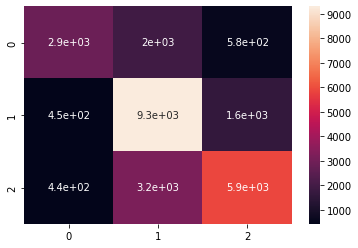

In [54]:
sns.heatmap(conf1, annot=True)

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix Random Forest", None),
                  ("Confusion matrix LGBM", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        conf1, display_labels=['1', '2','3'],
        cmap=plt.cm.Blues, normalize=normalize
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

AttributeError: ignored

In [ ]:
result = {'Model Name':['Decision Tree', 'Logistic Regression', 'Random Forest','LGBM'], 
          'Accuracy Score': [0.5602855732351042*100, 0.6813124216762237*100, 0.684768161622299*100,  0.693464474233851*100]}

In [ ]:
res = pd.DataFrame.from_dict(result)
res